# Практическая работа 3. Программные средства консолидации данных.
# Алексеев Константин БД-231м

## Цель работы
Освоить практические навыки консолидации данных из различных источников с использованием Python и библиотеки pandas.

## Задачи
1. Загрузить данные из различных источников (CSV, Excel, JSON).
2. Провести предварительную обработку и очистку данных.
3. Объединить данные из разных источников.
4. Выполнить агрегацию и трансформацию данных.
5. Сохранить консолидированные данные в новый файл.

## Необходимое программное обеспечение
- Python 3.x
- Библиотеки: pandas, numpy, matplotlib

## Исходные данные
- `sales_2022.csv`: данные о продажах за 2022 год
- `sales_2023.xlsx`: данные о продажах за 2023 год
- `products.json`: информация о продуктах


# Вариант 1. 
1. Файл CSV: данные о сотрудниках (имя, должность, зарплата). 
2. Файл Excel: данные о проектах (название проекта, бюджет, менеджер 
проекта). 
3. Файл JSON: данные о зарплатах по должностям. 

**Задача**: 
- объединить данные и рассчитать среднюю зарплату по каждому 
проекту, исходя из данных о сотрудниках и их участии в проектах.


## Ход работы

Процесс создания тестовых данных для файлов
- `employees.csv`
- `projects.xlsx`
- `project_assignments.json`


In [14]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
from datetime import datetime, timedelta
import random

Файл JSON c данные о зарплатах по должностям не нужен, так как эта информация уже есть в данных о сотрудниках. 
Вместо него создадим json, в котором будет информация о том кто задействован на проекте, тогда получится выполнить задание

In [2]:
# 1. Файл CSV: данные о сотрудниках (имя, должность, зарплата). 

num_employees = 2000
employee_names = [f'Сотрудник_{i}' for i in range(1, num_employees + 1)]
positions = np.random.choice(['Разработчик', 'Менеджер', 'Тестировщик', 'Аналитик'], size=num_employees)
salaries = np.random.randint(50_000, 120_000, size=num_employees) 

employees_df = pd.DataFrame({
    'employee_name': employee_names,
    'position': positions,
    'salary': salaries
})
employees_df.to_csv('data/employees.csv')

# 2. Файл Excel: данные о проектах (название проекта, бюджет, менеджер проекта). 
num_projects = 100
project_names = [f'Проект_{i}' for i in range(1, num_projects + 1)]
budgets = np.random.randint(100_000, 1_000_000, size=num_projects)
project_managers = np.random.choice(employee_names, size=num_projects)

projects_df = pd.DataFrame({
    'project_name': project_names,
    'budget': budgets,
    'project_manager': project_managers
})
projects_df.to_excel('data/projects.xlsx')


# 3. Файл JSON: данные о том кто задействован на проекте
project_assignments = {
    'project_name': np.random.choice(project_names, size=num_employees).tolist(),
    'employee_name': employee_names
}

with open('data/project_assignments.json', 'w', encoding='utf-8') as f:
    json.dump(project_assignments, f, ensure_ascii=False)

Особенности сгенерированных данных:
- Файлы связаны через `project_name` и `employee_name`
- Данные имеют реалистичную структуру и вариативность.
- Пропущенных данных нет, так как это является очень важной информации и вряд ли в реальной жизни будут пропуски в информации о ЗП или о том кто учавстсовал в проекте

### Шаг 1: Подготовка рабочей среды

1. Импортируйте необходимые библиотеки:



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Шаг 2: Загрузка данных

In [5]:
employees_df = pd.read_csv('data/employees.csv', index_col=[0])
projects_df = pd.read_excel('data/projects.xlsx', index_col=[0])
project_assignments_df = pd.read_json('data/project_assignments.json')

### Шаг 3: Предварительная обработка и очистка данных
1. Проверьте наличие пропущенных значений:

In [6]:
print("\nПропущенные значения:")
print(employees_df.isnull().sum())
print(projects_df.isnull().sum())
print(project_assignments_df.isnull().sum())


Пропущенные значения:
employee_name    0
position         0
salary           0
dtype: int64
project_name       0
budget             0
project_manager    0
dtype: int64
project_name     0
employee_name    0
dtype: int64


### Шаг 4: Объединение данных

In [7]:
# Объединение данных о сотрудниках и их участии в проектах
merged_df = project_assignments_df.merge(employees_df, left_on='employee_name', right_on='employee_name', how='left')

# Объединение с данными о проектах
final_merged_df = merged_df.merge(projects_df, on='project_name', how='left')

In [8]:
final_merged_df

,project_name,employee_name,position,salary,budget,project_manager
0,Проект_62,Сотрудник_1,Разработчик,82525,758003,Сотрудник_82
1,Проект_100,Сотрудник_2,Тестировщик,84992,774799,Сотрудник_955
2,Проект_4,Сотрудник_3,Менеджер,63970,873048,Сотрудник_1062
3,Проект_98,Сотрудник_4,Тестировщик,106709,671735,Сотрудник_1906
4,Проект_13,Сотрудник_5,Менеджер,101589,808066,Сотрудник_467
...,...,...,...,...,...,...
1995,Проект_20,Сотрудник_1996,Разработчик,72440,664962,Сотрудник_150
1996,Проект_49,Сотрудник_1997,Тестировщик,95739,952178,Сотрудник_34
1997,Проект_35,Сотрудник_1998,Менеджер,107833,938625,Сотрудник_1420
1998,Проект_95,Сотрудник_1999,Разработчик,76103,554115,Сотрудник_1851


In [11]:
final_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   project_name     2000 non-null   object
 1   employee_name    2000 non-null   object
 2   position         2000 non-null   object
 3   salary           2000 non-null   int64 
 4   budget           2000 non-null   int64 
 5   project_manager  2000 non-null   object
dtypes: int64(2), object(4)
memory usage: 93.9+ KB


In [12]:
final_merged_df.describe()

,salary,budget
count,2000.000000,2000.000000
mean,85298.341000,520533.187500
std,20185.691933,256787.651532
min,50008.000000,104123.000000
25%,67262.500000,272744.000000
50%,86273.500000,530303.000000
75%,101960.500000,727086.000000
max,119985.000000,995187.000000


### Шаг 5: Агрегация и трансформация данных
Рассчитае среднюю зарплату по каждому проекту, исходя из данных о сотрудниках и их участии в проектах.

In [9]:
average_salary_per_project = final_merged_df.groupby('project_name')['salary'].mean().reset_index()

In [10]:
average_salary_per_project

,project_name,salary
0,Проект_1,86304.750000
1,Проект_10,85865.950000
2,Проект_100,83132.260870
3,Проект_11,88303.363636
4,Проект_12,76659.583333
...,...,...
95,Проект_95,87140.000000
96,Проект_96,83559.409091
97,Проект_97,84294.900000
98,Проект_98,88433.333333


In [18]:
average_salary_per_project.describe()

,salary
count,100.000000
mean,85434.189545
std,4282.348013
min,76212.043478
25%,83096.704581
50%,85113.334559
75%,87979.379371
max,100583.160000


Так как данные были сгенерированы из uniform распределения, то статистики особенно не примечательные низкий разброс. смещение стремится к среднему (120к + 70к) / 2 - 85к

### Шаг 6: Визуализация данных


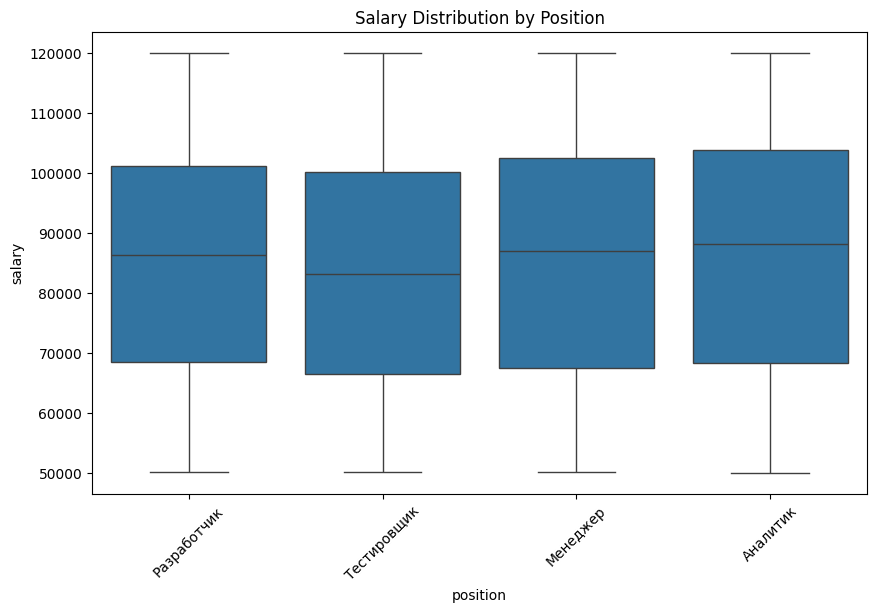

In [16]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='position', y='salary', data=final_merged_df)
plt.title('Salary Distribution by Position')
plt.xticks(rotation=45)
plt.show()


Зарплатные также имеют uniform распределение. Но в реальной жизни эта была ба достаточно интересная информация на которую было бы интересно взгляднуть. Особенно в разрезе разных грейдов и какие там бывает аномалии (макс и мин зп), ну и конечно интеркванительные размахи тоже были бы интересны

Посмотрим на распределение бюджета

In [21]:
budget_stats = final_merged_df['budget'].describe()
budget_stats

count      2000.000000
mean     520533.187500
std      256787.651532
min      104123.000000
25%      272744.000000
50%      530303.000000
75%      727086.000000
max      995187.000000
Name: budget, dtype: float64

In [23]:
budget_by_manager = final_merged_df.groupby('project_manager')['budget'].sum().sort_values(ascending=False)
budget_by_manager

project_manager
Сотрудник_373     25044600
Сотрудник_1645    21692550
Сотрудник_433     20430050
Сотрудник_1714    19713440
Сотрудник_1463    19634936
                    ...   
Сотрудник_908      2188992
Сотрудник_991      2106800
Сотрудник_596      1850251
Сотрудник_488      1834898
Сотрудник_125      1595790
Name: budget, Length: 98, dtype: int64

Распределение бюджета по проектным менеджерам

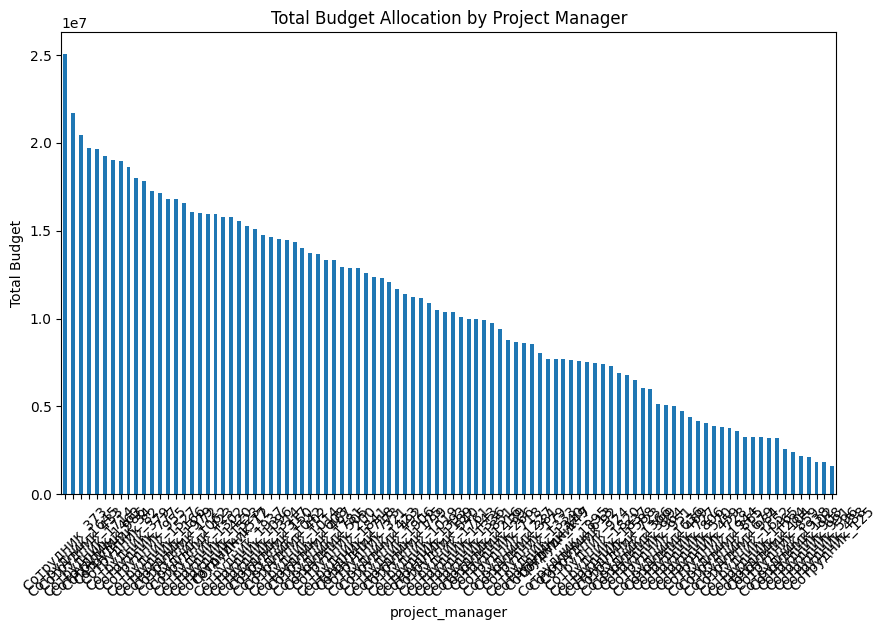

In [24]:

plt.figure(figsize=(10, 6))
budget_by_manager.plot(kind='bar')
plt.title('Total Budget Allocation by Project Manager')
plt.ylabel('Total Budget')
plt.xticks(rotation=45)
plt.show()


Распределение сотрудников по должности

position
Разработчик    525
Тестировщик    505
Аналитик       486
Менеджер       484
Name: count, dtype: int64


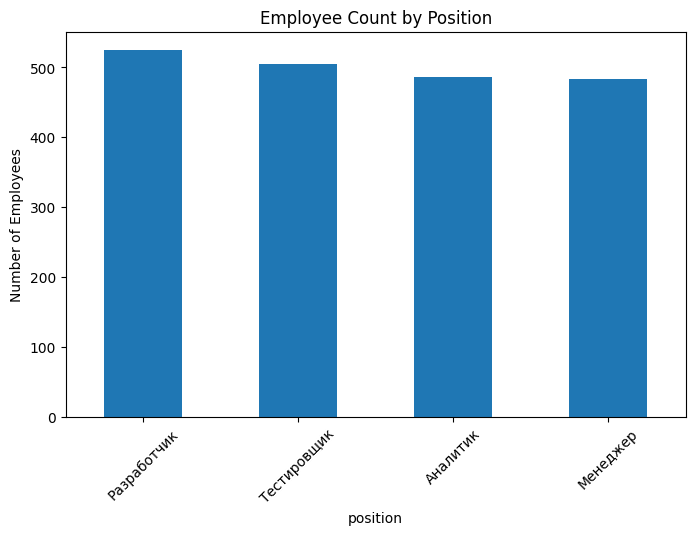

In [ ]:
position_distribution = final_merged_df['position'].value_counts()
print(position_distribution)

plt.figure(figsize=(8, 5))
position_distribution.plot(kind='bar')
plt.title('Employee Count by Position')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.show()


Корреляционный анализ

          salary    budget
salary  1.000000  0.019995
budget  0.019995  1.000000


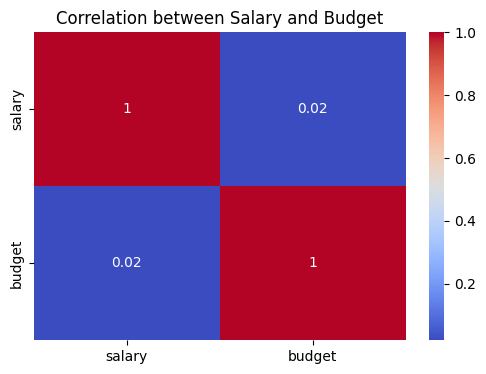

In [29]:
correlation = final_merged_df[['salary', 'budget']].corr()
print(correlation)

# Visualization of correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation between Salary and Budget')
plt.show()


### Шаг 7: Сохранение консолидированных данных
Сохраните консолидированные данные в CSV-файл:

In [64]:
final_merged_df.to_csv('final_merged_df.csv', index=False)

**ИТОГ:**  Сгенерировали и объединили данные, рассчитали среднюю зарплату по каждому 
проекту, исходя из данных о сотрудниках и их участии в проектах